<a href="https://colab.research.google.com/github/Wajira1225/MachineLearning_Question01/blob/main/Bank_(Assignment_02).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CHAPTER 1: PRE-PROCESSING**

#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import statsmodels.api as sm
sb.set()

#Mount the Google Drive

In [ ]:
from google.colab import drive 
drive.mount ('/content/drive')

Mounted at /content/drive


#Load the Dataset

In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Bank/bank-full.csv')

#The head function in Python displays the first five rows of the data frame by Default

In [ ]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#The tail function in Python displays the last five rows of the data frame by default

In [ ]:
Data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


#Shape

In [ ]:
Data.shape

(45211, 17)

#Checking null values

In [ ]:
Data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

#Checking Data Types

In [ ]:
Data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

#**CHAPTER 2: EXPLORATORY DATA ANALYSIS**

#Descriptive Statistics for Numerical Variables

In [ ]:
Data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#Determine the number of unique Values

In [ ]:
Data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

#Correlation between Columns

In [ ]:
Correlation = Data.corr()
Correlation

<ipython-input-12-ee4d320fb5cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation = Data.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


#Plotting histograms for numerical variables

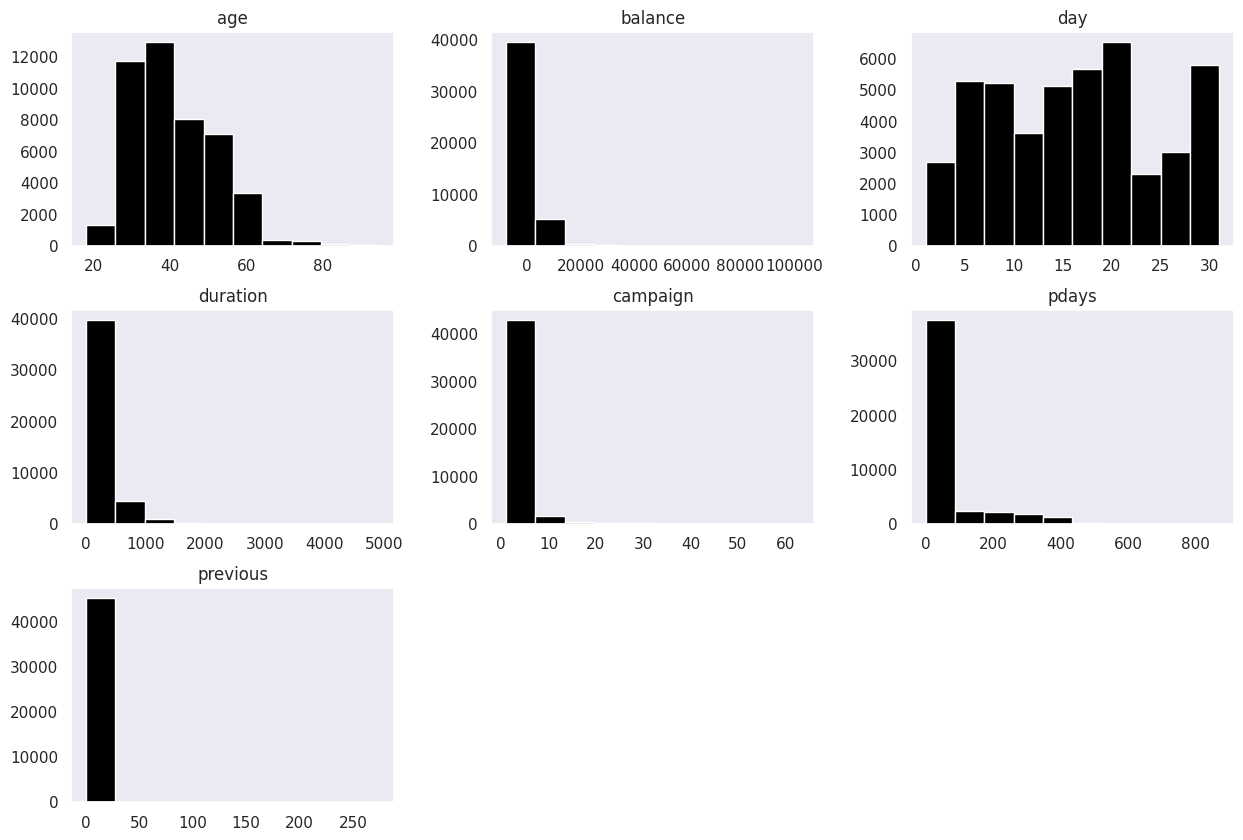

In [ ]:
Data.hist(figsize=(15,10),color = "black", grid = False)
plt.show()

#**Comparison of categorical variables**

#Comparison of Jobs

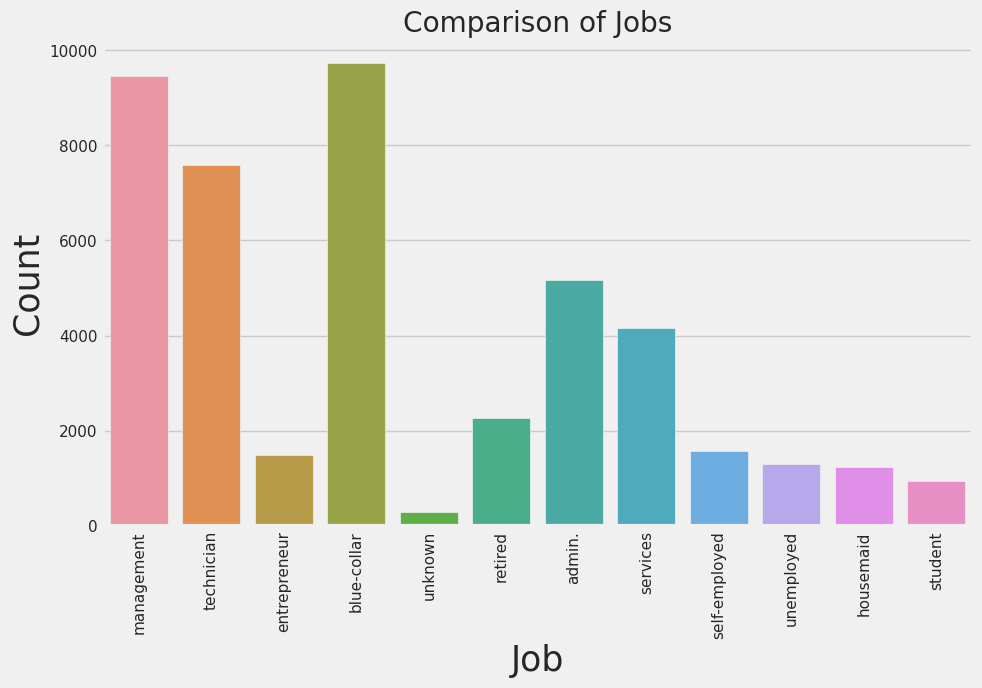

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('fivethirtyeight')

sb.countplot(data  = Data,  x = 'job')
plt.title('Comparison of Jobs', fontweight=27)
plt.xlabel('Job', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.xticks(rotation='vertical')
plt.show()

#Comparison of Education Level

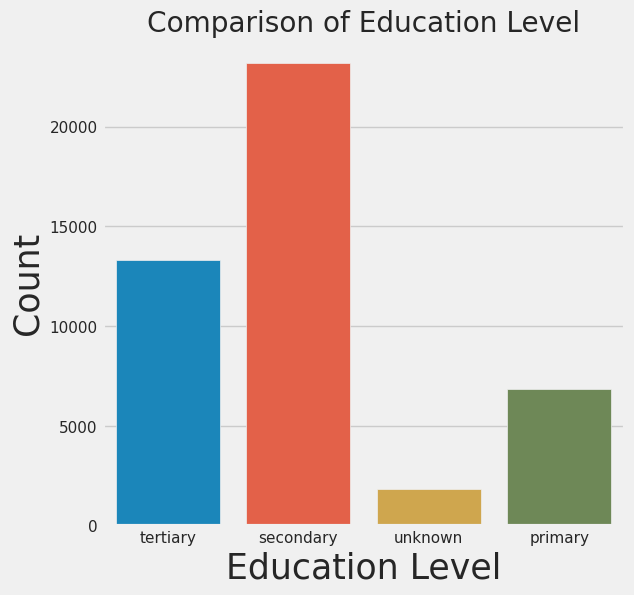

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data  = Data,  x = 'education')
plt.title('Comparison of Education Level', fontweight=27)
plt.xlabel('Education Level', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.show()

#Comparison of Marital Status

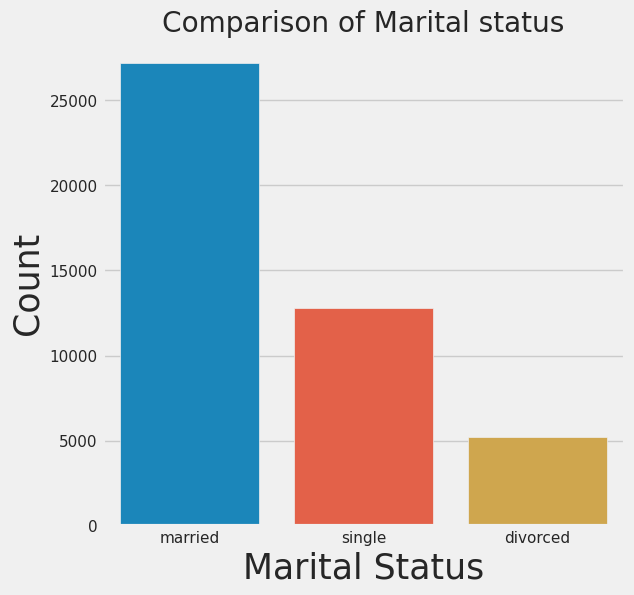

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data  = Data,  x = 'marital')
plt.title('Comparison of Marital status', fontweight=27)
plt.xlabel('Marital Status', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.show()

#Comparison of Subscription

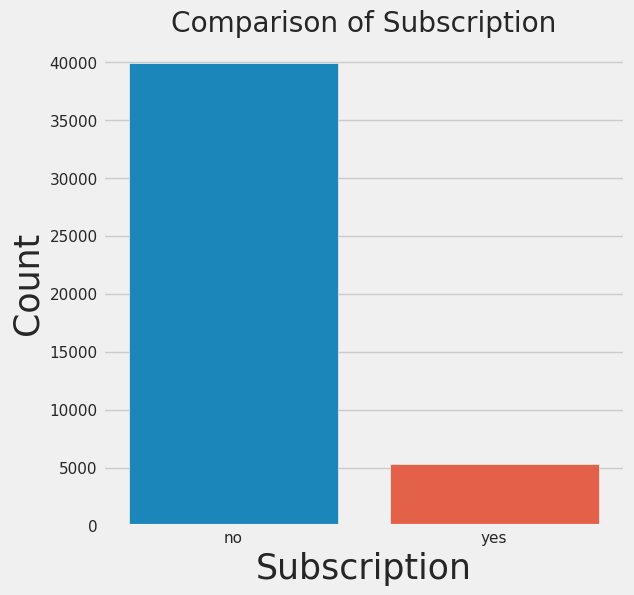

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data  = Data,  x = 'Target')
plt.title('Comparison of Subscription', fontweight=27)
plt.xlabel('Subscription', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.show()

#Comparison of Housing

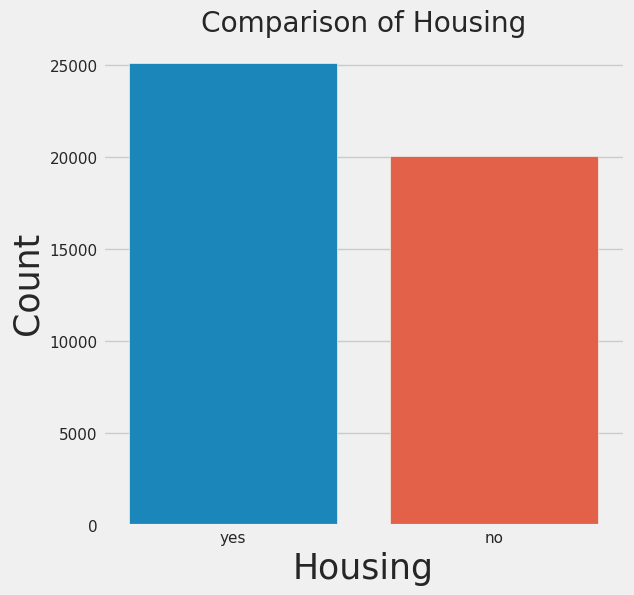

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data  = Data,  x = 'housing')
plt.title('Comparison of Housing', fontweight=27)
plt.xlabel('Housing', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.show()

#Comparison of Loan

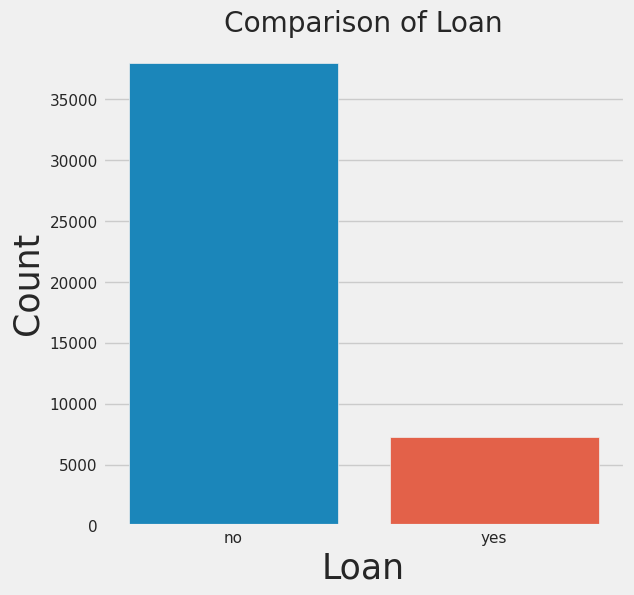

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data  = Data,  x = 'loan')
plt.title('Comparison of Loan', fontweight=27)
plt.xlabel('Loan', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.show()

#Contact Distribution

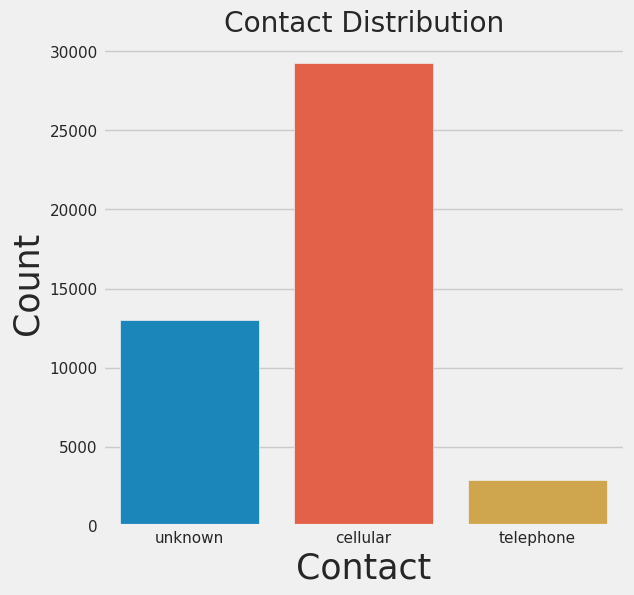

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data  = Data,  x = 'contact')
plt.title('Contact Distribution', fontweight=27)
plt.xlabel('Contact', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.show()

#Comparison of Months

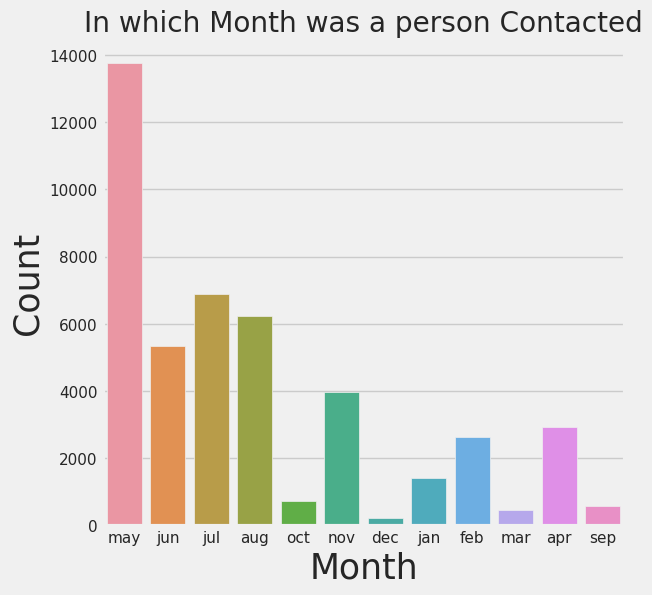

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data  = Data,  x = 'month')
plt.title('In which Month was a person Contacted', fontweight=27)
plt.xlabel('Month', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.show()

#Comparison of poutcome

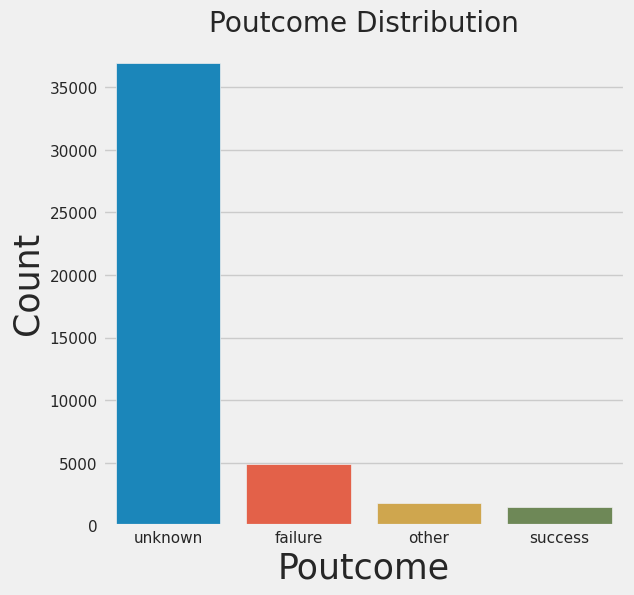

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)
plt.style.use('fivethirtyeight')

sb.countplot(data  = Data,  x = 'poutcome')
plt.title('Poutcome Distribution', fontweight=27)
plt.xlabel('Poutcome', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.show()

#Scatter plot for every numerical variable to visualize correlation

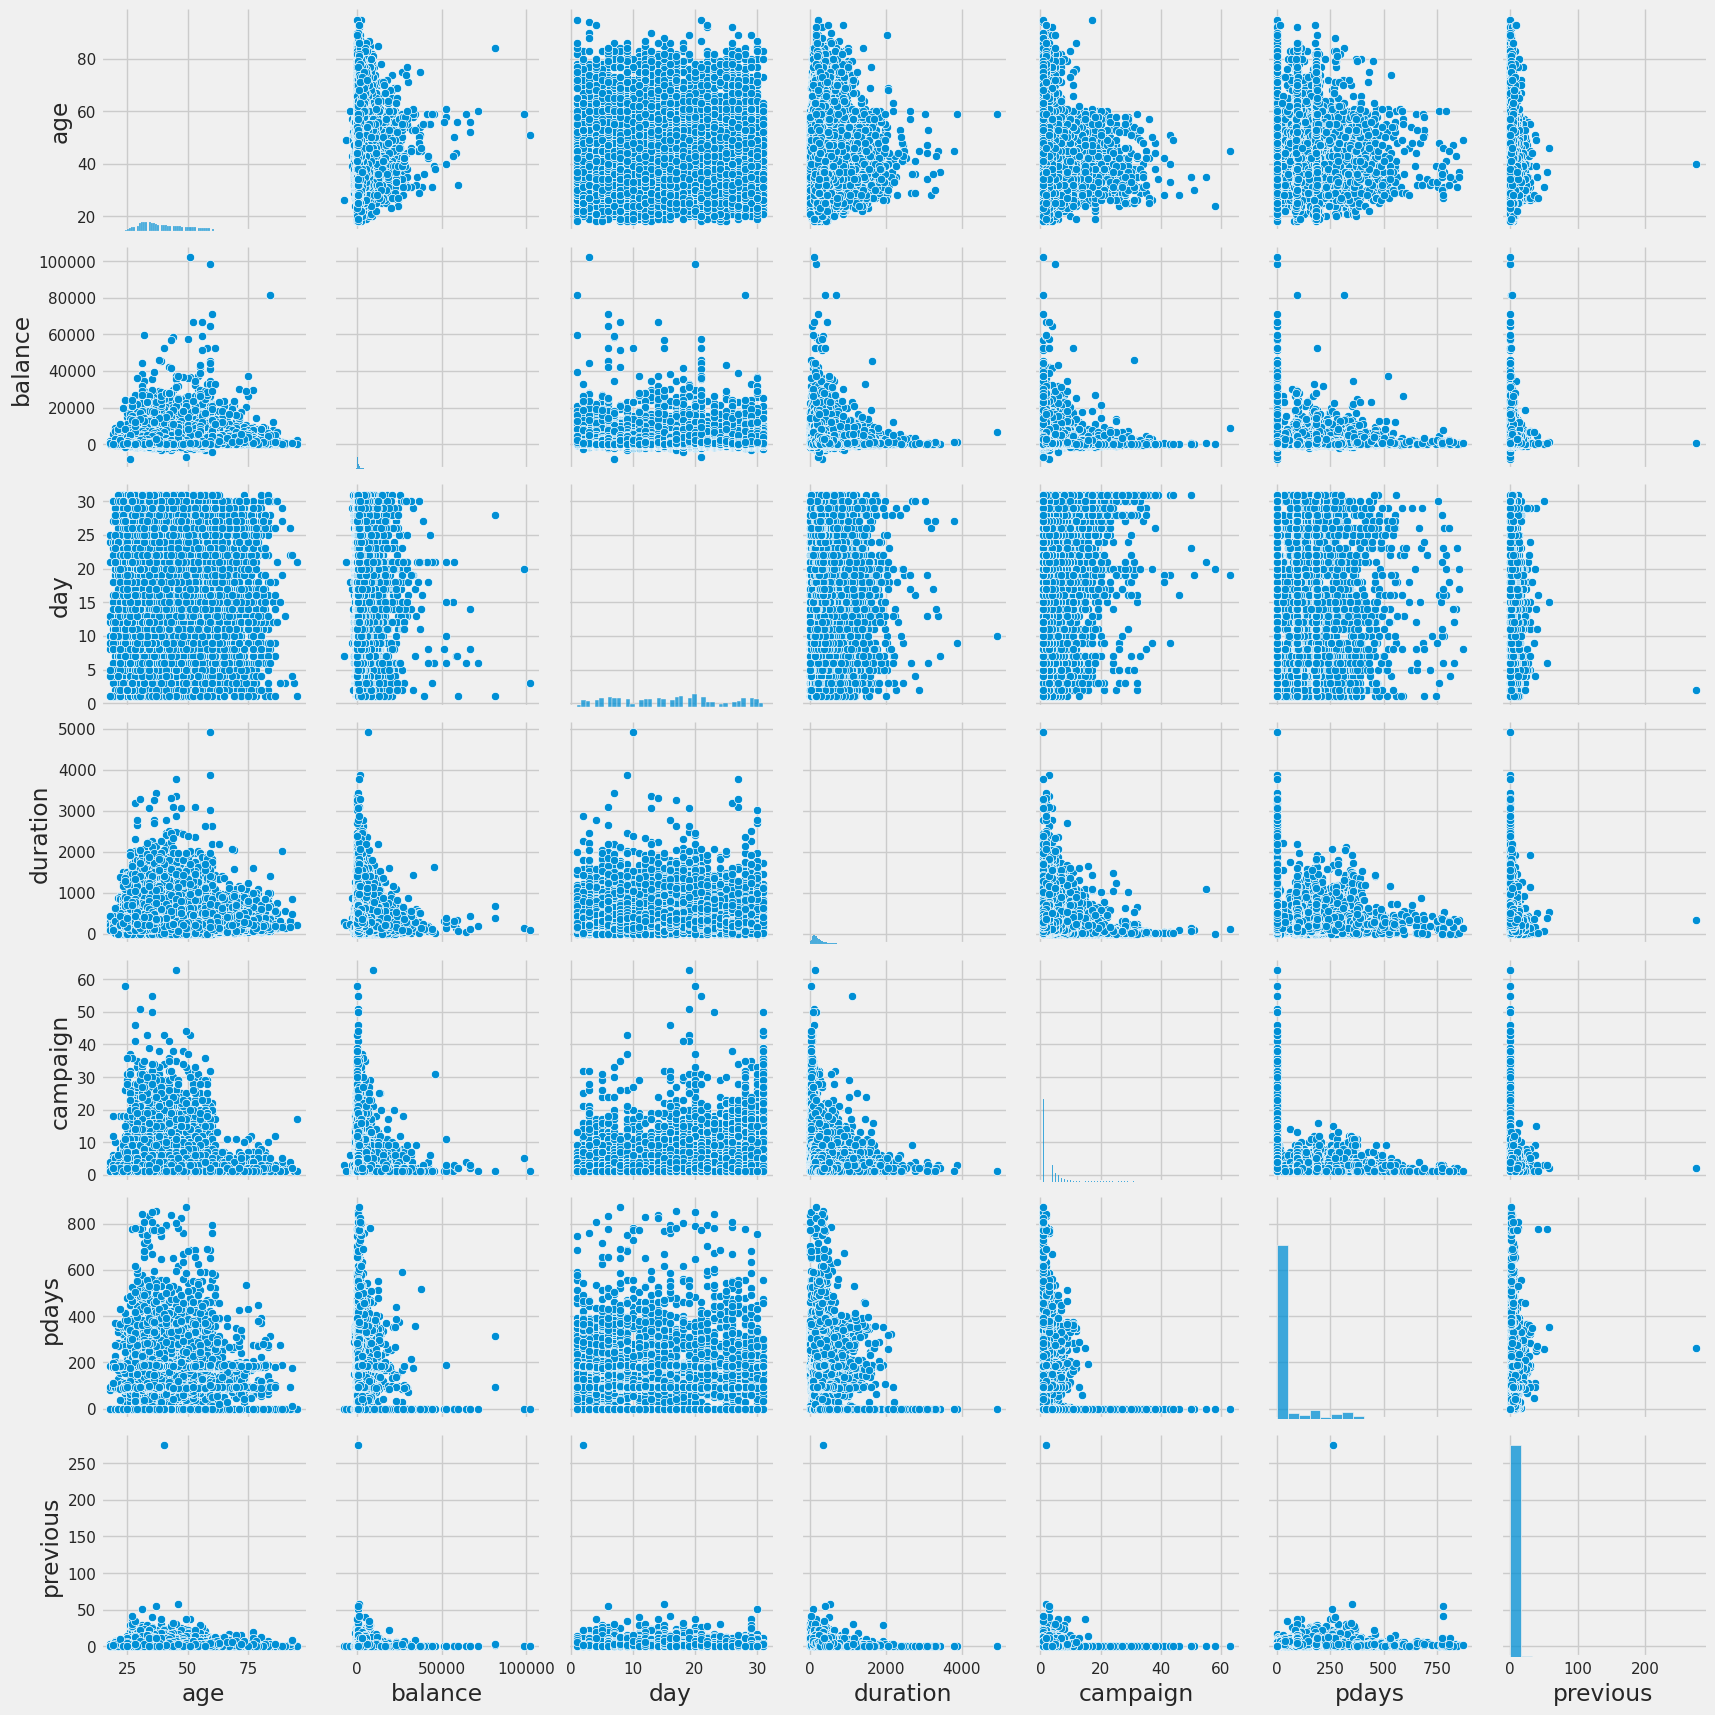

In [ ]:
sb.pairplot(Data)

#The distribution of the age, balance, previous, and campaign Variables

<ipython-input-30-11db4f2b62ac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(Data['age'])


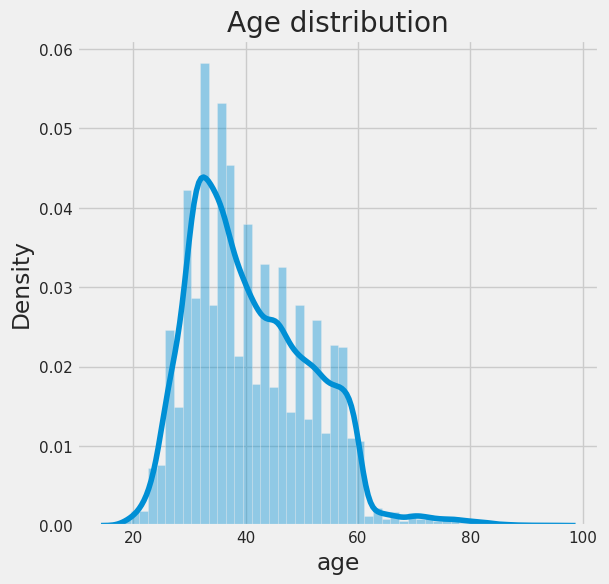

In [ ]:
sb.distplot(Data['age'])
plt.title('Age distribution', fontweight=27)
plt.show()

<ipython-input-31-95deda45954a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(Data['balance'])


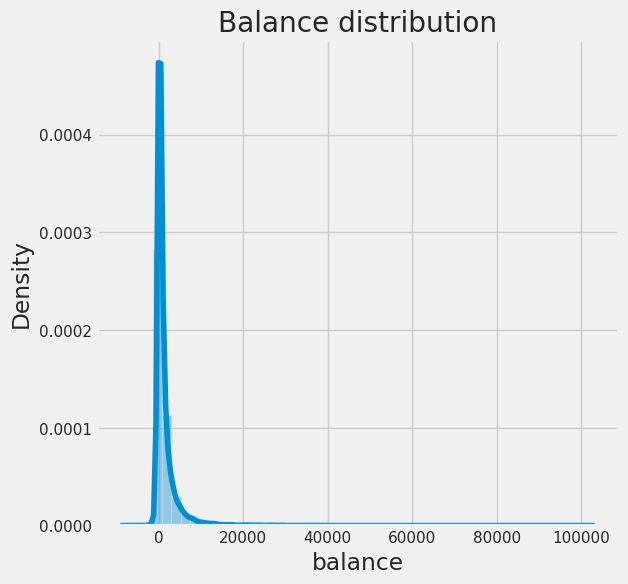

In [ ]:
sb.distplot(Data['balance'])
plt.title('Balance distribution', fontweight=27)
plt.show()

<ipython-input-32-0af3ee8609c2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(Data['campaign'])


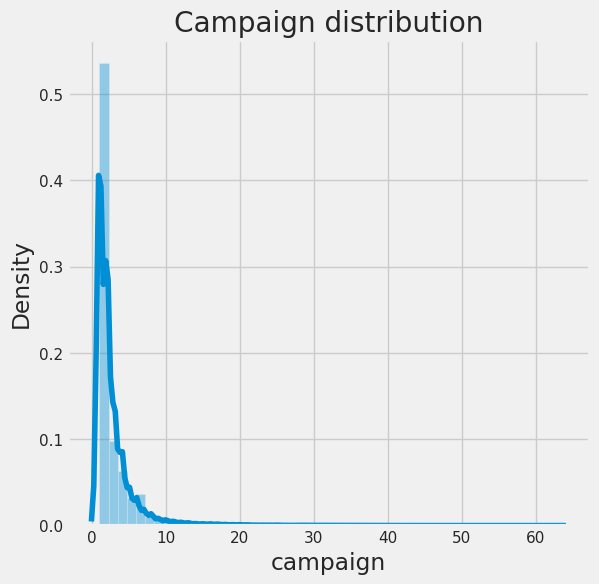

In [ ]:
sb.distplot(Data['campaign'])
plt.title('Campaign distribution', fontweight=27)
plt.show()

<ipython-input-33-4e10d433ee59>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(Data['previous'])


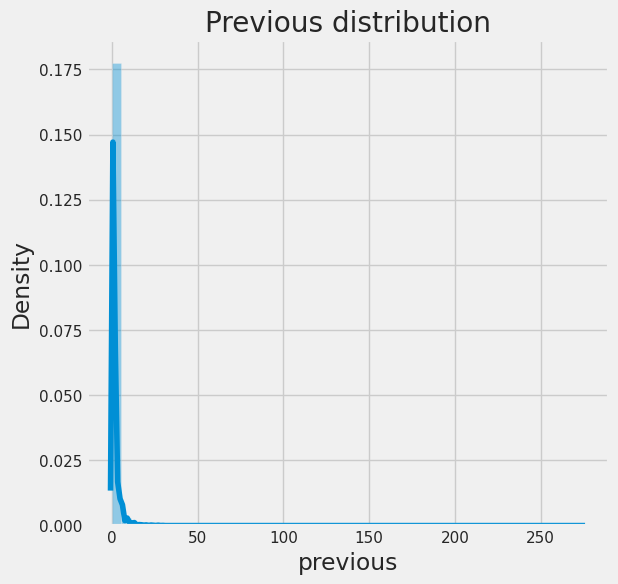

In [ ]:
sb.distplot(Data['previous'])
plt.title('Previous distribution', fontweight=27)
plt.show()

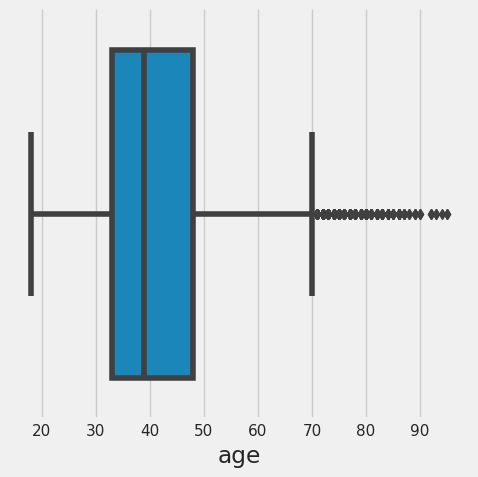

In [ ]:
sb.catplot(x ='age', kind = 'box', data = Data)

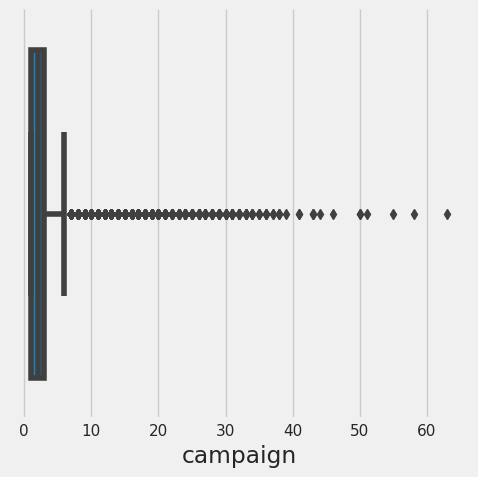

In [ ]:
sb.catplot(x ='campaign', kind = 'box', data = Data)

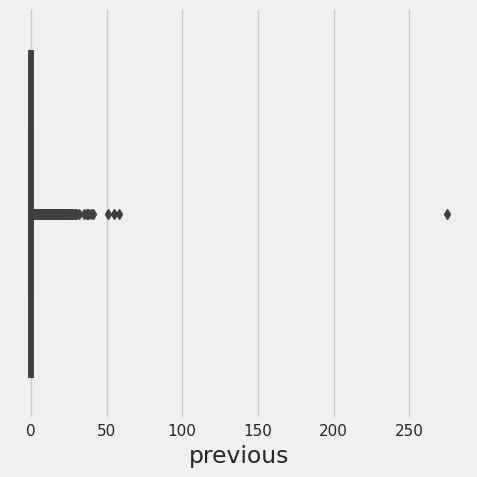

In [ ]:
sb.catplot(x ='previous', kind = 'box', data = Data)

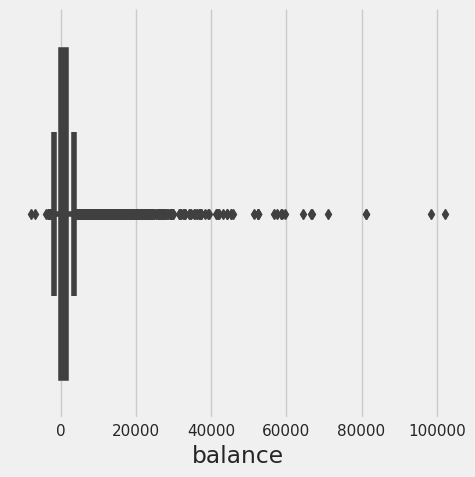

In [ ]:
sb.catplot(x ='balance', kind = 'box', data = Data)

#Educational Level vs Subscription

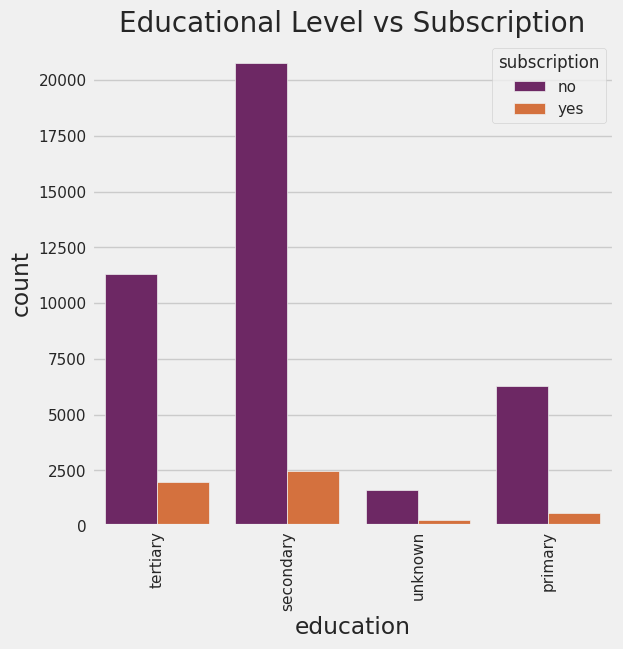

In [ ]:
sb.countplot(x = Data['education'], data = Data, hue = Data['Target'], palette = 'inferno')
plt.title('Educational Level vs Subscription', fontsize = 20, fontweight = 30)
plt.xticks(rotation = 'vertical')
plt.legend(title = 'subscription')
plt.show()

#Job Title vs Subscription

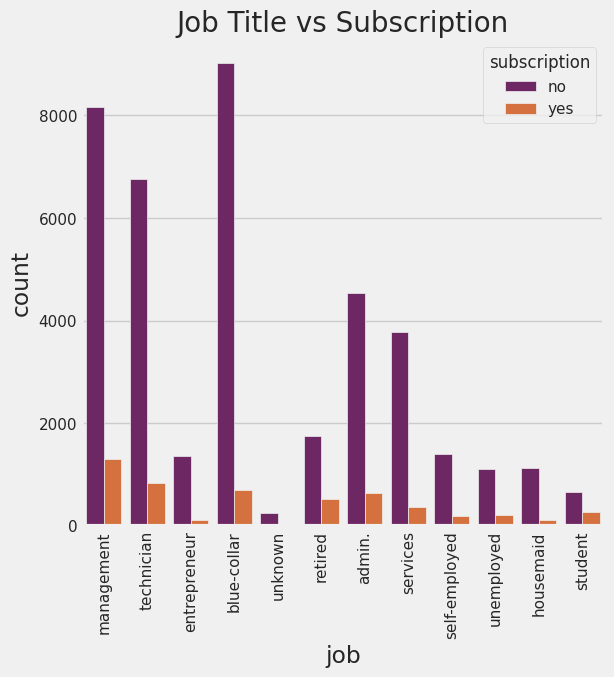

In [ ]:
sb.countplot(x = Data['job'], data = Data, hue = Data['Target'], palette = 'inferno')
plt.title('Job Title vs Subscription', fontsize = 20, fontweight = 30)
plt.xticks(rotation = 'vertical')
plt.legend(title = 'subscription')
plt.show()

#**CHAPTER 3: LOGISTIC REGRESSION**

#Setting up a logistic regression model

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#Create an instance of LabelEncoder
le = LabelEncoder()

#Perform label encoding on the "Category" column
Data["job_new"] = le.fit_transform(Data["job"])

Data["marital_new"] = le.fit_transform(Data["marital"])

Data["education_new"] = le.fit_transform(Data["education"])

Data["Target_new"] = le.fit_transform(Data["Target"])

Data["poutcome_new"] = le.fit_transform(Data["poutcome"])

Data["default_new"] = le.fit_transform(Data["default"])

Data["housing_new"] = le.fit_transform(Data["housing"])

Data["loan_new"] = le.fit_transform(Data["loan"])

In [ ]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,Target,job_new,marital_new,education_new,Target_new,poutcome_new,default_new,housing_new,loan_new
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,unknown,no,4,1,2,0,3,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,unknown,no,9,2,1,0,3,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,unknown,no,2,1,1,0,3,0,1,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,unknown,no,1,1,3,0,3,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,unknown,no,11,2,3,0,3,0,0,0


In [ ]:
Data.isnull().sum()

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
Target           0
job_new          0
marital_new      0
education_new    0
Target_new       0
poutcome_new     0
default_new      0
housing_new      0
loan_new         0
dtype: int64

#Define the independent and dependent variables

In [ ]:
x = Data[['marital_new','job_new','education_new','age']]
y = Data['Target_new']

##Split data set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=43)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33908, 4)
(11303, 4)
(33908,)
(11303,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mm = MinMaxScaler()

x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [ ]:
#Creating a model
model = LogisticRegression()

#Model fitting
model.fit(x_train, y_train)

#Generate predictions
y_Pred = model.predict(x_test)

In [ ]:
#Overall accuracy
accuracy = accuracy_score(y_test, y_Pred)
print('Accuracy:', accuracy)

Accuracy: 0.8822436521277537


In [ ]:
#Calculating the classification accuracies
print("Training Accuracy", model.score(x_train, y_train)) 
print("Testing Accuracy", model.score(x_test, y_test))

Training Accuracy 0.8832723840981479
Testing Accuracy 0.8822436521277537


In [ ]:
#Generate classification report
report = classification_report(y_test, y_Pred)

#Print the report
print(report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      9972
           1       0.00      0.00      0.00      1331

    accuracy                           0.88     11303
   macro avg       0.44      0.50      0.47     11303
weighted avg       0.78      0.88      0.83     11303



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Area under curve
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = model.predict_proba(x_test)[:, 1]
auc_score = roc_auc_score(y_test, y_scores)
print('AUC:', auc_score)

AUC: 0.5817869297745182


In [ ]:
#Not completed
#Calculating the classification accuracies

print("Training Accuracy", model.score(x_train, y_train)) 
print("Testing Accuracy", model.score(x_test, y_test))

CR_RF = classification_report(y_test,y_Pred)
fprRF, recallRF, thresholdsRF = roc_curve(y_test, y_Pred)
AUC_RF = roc_auc_score(fprRF, recallRF)

resultsRF = {"\nClassification Report":CR_RF,"\nArea Under Curve":AUC_RF}

#Printing the results
for measure in resultsRF:
  print(measure,": \n",resultsRF[measure])

Training Accuracy 0.8832723840981479
Testing Accuracy 0.8822436521277537

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      9972
           1       0.00      0.00      0.00      1331

    accuracy                           0.88     11303
   macro avg       0.44      0.50      0.47     11303
weighted avg       0.78      0.88      0.83     11303


Area Under Curve : 
 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
